# E-Commerce Revenue Prediction with Tree Ensemble Machine Learning Models

Tyler Kinkade     
University of Colorado

## Overview

In this supervised machine learning project, I compare the effectiveness of the random forest and gradient boosting tree ensemble models in predicting the probability of making a purchase on an e-commerce website based on users' interactions with the site. I also examine differences in feature importance between the two models. Before reporting the methods, results, and discussion of this main analysis, I first begin with exploratory data analysis of the data.

## Exploratory Data Analysis

### Dataset Overview

The data for this project comes from the UCI Machine Learning Repository "Online Shoppers Purchasing Intention Dataset" (Sakar & Kastro, 2018). It consists of 18 features and 12,330 website interaction sessions by unique users of an unnamed e-commerce site. The features include visit counts for three categories of web pages (administrative, informational, and product related) by a user; viewing duration for each of those same categories, Google Analytics [bounce rate, exit rate](https://support.google.com/analytics/answer/2525491), and [page value](https://support.google.com/analytics/answer/2695658); proximity to a holiday (e.g., Mother's Day); month of visit; operating system type; browser; region; traffic type; visitor type; whether the visit was during a weekend; and whether the visit resulted in revenue to the site. These features and their data types are summarized below.

| Feature | Description | Data Type |
| ------- | ----------- | --------- |
| Administrative | Visits to pages within this category for this session | Numerical (discrete) |
| Administrative Duration | Viewing time of pages in this category for this session | Numerical (continuous) |
| Informational | Visits to pages within this category for this session | Numerical (discrete) |
| Informational Duration | Viewing time of pages in this category for this session | Numerical (continuous) |
| Product Related | Visits to pages within this category for this session | Numerical (discrete) |
| Product Related Duration | Viewing time of pages in this category for this session | Numerical (continuous) |
| Bounce Rates | Average rate for which a web page was both the first and last viewed in a session | Numerical (continuous) |
| Exit Rates | Average rate for which a web page was the last viewed in a session | Numerical (continuous) |
| Page Values | Average resulting revenue for page over all sessions | Numerical (continuous) |
| Special Day | Normalized proximity of session date to a holiday accounting for delivery time | Numerical (continuous)|
| Month | Month in which session occured | Categorical (ordered) |
| Operating Systems | Operating system used in session (8 categories) | Categorical (nominal) |
| Browser | Internet browser used in session (13 categories) | Categorical (nominal) |
| Region | User's region (9 categories) | Categorical (nominal) |
| Traffic Type | How session was initiated (20 categores: direct, referred, etc.) | Categorical (nominal) |
| Visitor Type | First-time (2), returning user (1), or other (0) | Categorical (nominal) |
| Weekend | Whether session occurred on weekend | Categorical (Boolean) |
| Revenue | Whether session resulted in revenue | Categorical (Boolean) |

NB: Google Analytics [bounce rate, exit rate](https://support.google.com/analytics/answer/2525491), and [page value](https://support.google.com/analytics/answer/2695658) are calculated for specific pages ("Google Analytics Help Center," 2023). The dataset contributors did not specify whether these features are for the page which the user first visited during the session, the mean of all pages visited by the user, or the mean of all pages at the time of the visit.

The following code blocks load the data, prepare it for analysis, and report descriptive statistics.

In [1]:
# Create Pandas dataframe from dataset
import pandas as pd

df = pd.read_csv('online_shoppers_intention.csv.gz', compression = 'gzip')
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


Some of the automatically assigned data types require correction and coding the month abbreviations will facilitate analysis:

In [2]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Fortunately, there are no missing values:

In [3]:
# Check for missing values
df.isnull().values.any()

False

In [4]:
# Convert month names/abbreviations to numbers
# References: 
# https://docs.python.org/3/library/calendar.html
# https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html

import calendar

# Create dictionary of month names and abbreviations mapped to number of month
months = {}

# Iterate over array of month names
for index, month in enumerate(calendar.month_name):
    # If non-empty string (0 index of month_name is empty string)
    if month:
        months[month] = index

# Iterate over array of month abbreviations
for index, month in enumerate(calendar.month_abbr):
    # If non-empty string (0 index of month_abbr is empty string)
    if month:
        months[month] = index

# Replace month name/abbreviation with number
df.Month = df.Month.map(months)

In [5]:
# Correct categorical data types

# Create lists of column names
col_names = df.columns.values.tolist()
num_col_names = col_names[:10]
cat_col_names = col_names[10:]

# Change non-Boolean categorical features to categorical data type
df[cat_col_names[:6]] = df[cat_col_names[:6]].astype('category')

# Change month column to ordered categorical data type
# Reference: https://pandas.pydata.org/docs/user_guide/categorical.html

from pandas.api.types import CategoricalDtype

df.Month = df.Month.astype(CategoricalDtype(ordered=True))

In [6]:
# Recheck data types and number of non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Administrative           12330 non-null  int64   
 1   Administrative_Duration  12330 non-null  float64 
 2   Informational            12330 non-null  int64   
 3   Informational_Duration   12330 non-null  float64 
 4   ProductRelated           12330 non-null  int64   
 5   ProductRelated_Duration  12330 non-null  float64 
 6   BounceRates              12330 non-null  float64 
 7   ExitRates                12330 non-null  float64 
 8   PageValues               12330 non-null  float64 
 9   SpecialDay               12330 non-null  float64 
 10  Month                    12330 non-null  category
 11  OperatingSystems         12330 non-null  category
 12  Browser                  12330 non-null  category
 13  Region                   12330 non-null  category
 14  Traffi

The descriptive statistics for the numerical features are summarized in the following table.

In [7]:
# Summarize numerical data
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000


For the categorical features, the number of unique categories, top (i.e., most frequently) occuring category, and the number of occurences of the top category are summarized below. The names of the coded categories within the operating systems, browser, region, and traffic type features were not specified in the UCI repository. One interesting observation is that the largest number of sessions were recorded during May (when Mother's Day occurs). 

In [8]:
# Summarize categorical data
df[cat_col_names].describe()

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330,12330,12330,12330,12330,12330,12330,12330
unique,10,8,13,9,20,3,2,2
top,5,2,2,1,2,Returning_Visitor,False,False
freq,3364,6601,7961,4780,3913,10551,9462,10422


It is necessary to convert the visitor type feature categories to arbitrary integer codes in order to fit the tree ensemble models.

In [9]:
# Get unique categories for visitor type
visitor_categories = df.VisitorType.unique()
visitor_categories

['Returning_Visitor', 'New_Visitor', 'Other']
Categories (3, object): ['New_Visitor', 'Other', 'Returning_Visitor']

In [10]:
# Codes for visitor type categories
visitor_categories.codes

array([2, 0, 1], dtype=int8)

In [11]:
# Replace visitor type category names with corresponding integer codes
# Reference: https://stackoverflow.com/a/61761109/14371011

df[['VisitorType']] = df[['VisitorType']].apply(lambda col: pd.Categorical(col).codes).astype('category')

In [12]:
# Most frequent category should be 2 with frequency 10551/12330
df.VisitorType.describe()

count     12330
unique        3
top           2
freq      10551
Name: VisitorType, dtype: int64

Below, we can see that the dependent variable for this analysis (Revenue) is unbalanced. Only about 15% of the sessions resulted in purchases. 

In [13]:
# Calculate fraction of successful (True) and failed (False) revenue results

df.Revenue.value_counts()/len(df)

Revenue
False    0.845255
True     0.154745
Name: count, dtype: float64

### Data Exploration
Next, I examine the pairwise relationships between the features. In the correlation coefficient matrix heat map of the numerical features below, we can see that the web page category view count and duration features are correlated. This makes sense intuitively as every page visited within a category contributes toward lengthening the duration for that category. In addition, the exit and bounce rates are very strongly correlated. This is also unsurprising because every bounce from a web page must also be counted as an exit. This collinearity would be problematic in linear and logistic regression, but tree ensemble methods are considered robust against multicollinearity (James et al., 2021).

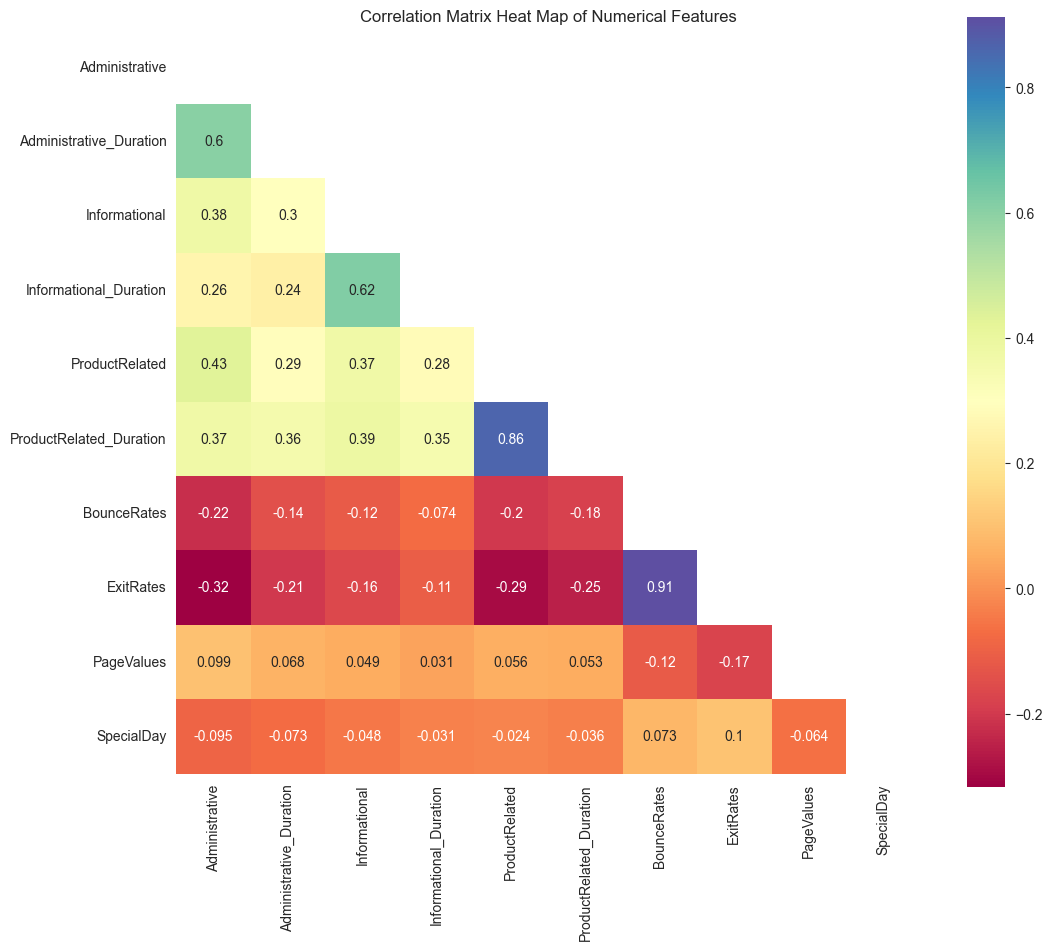

In [14]:
# Plot correlation coefficient matrix heat map of numerical features
# Reference: https://cmdlinetips.com/2020/02/lower-triangle-correlation-heatmap-python/                        

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Calculate correlation matrix for numerical features
corr = df[num_col_names].corr() 

# Create upper triangular Boolean matrix of same size
mask = np.triu(np.ones(corr.shape)).astype(bool)

# Plot
sns.set_style('whitegrid')
with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(12, 10))
    ax = sns.heatmap(corr, mask = mask, square = True, annot = True, cmap = "Spectral")
plt.title('Correlation Matrix Heat Map of Numerical Features');

In the pair and kernel distribution estimation (KDE) plots below, the aforementioned correlations between product page views and duration and between exit and bounce rate are readily apparent. In addition, the KDE plots indicate all of the numerical features are right skewed. This would be problematic for linear regression, but tree ensemble models are considered robust against skewness and outliers (James et al., 2021). We can also see that the proximity to special days is effectively a discrete variable because of the way values are assigned.

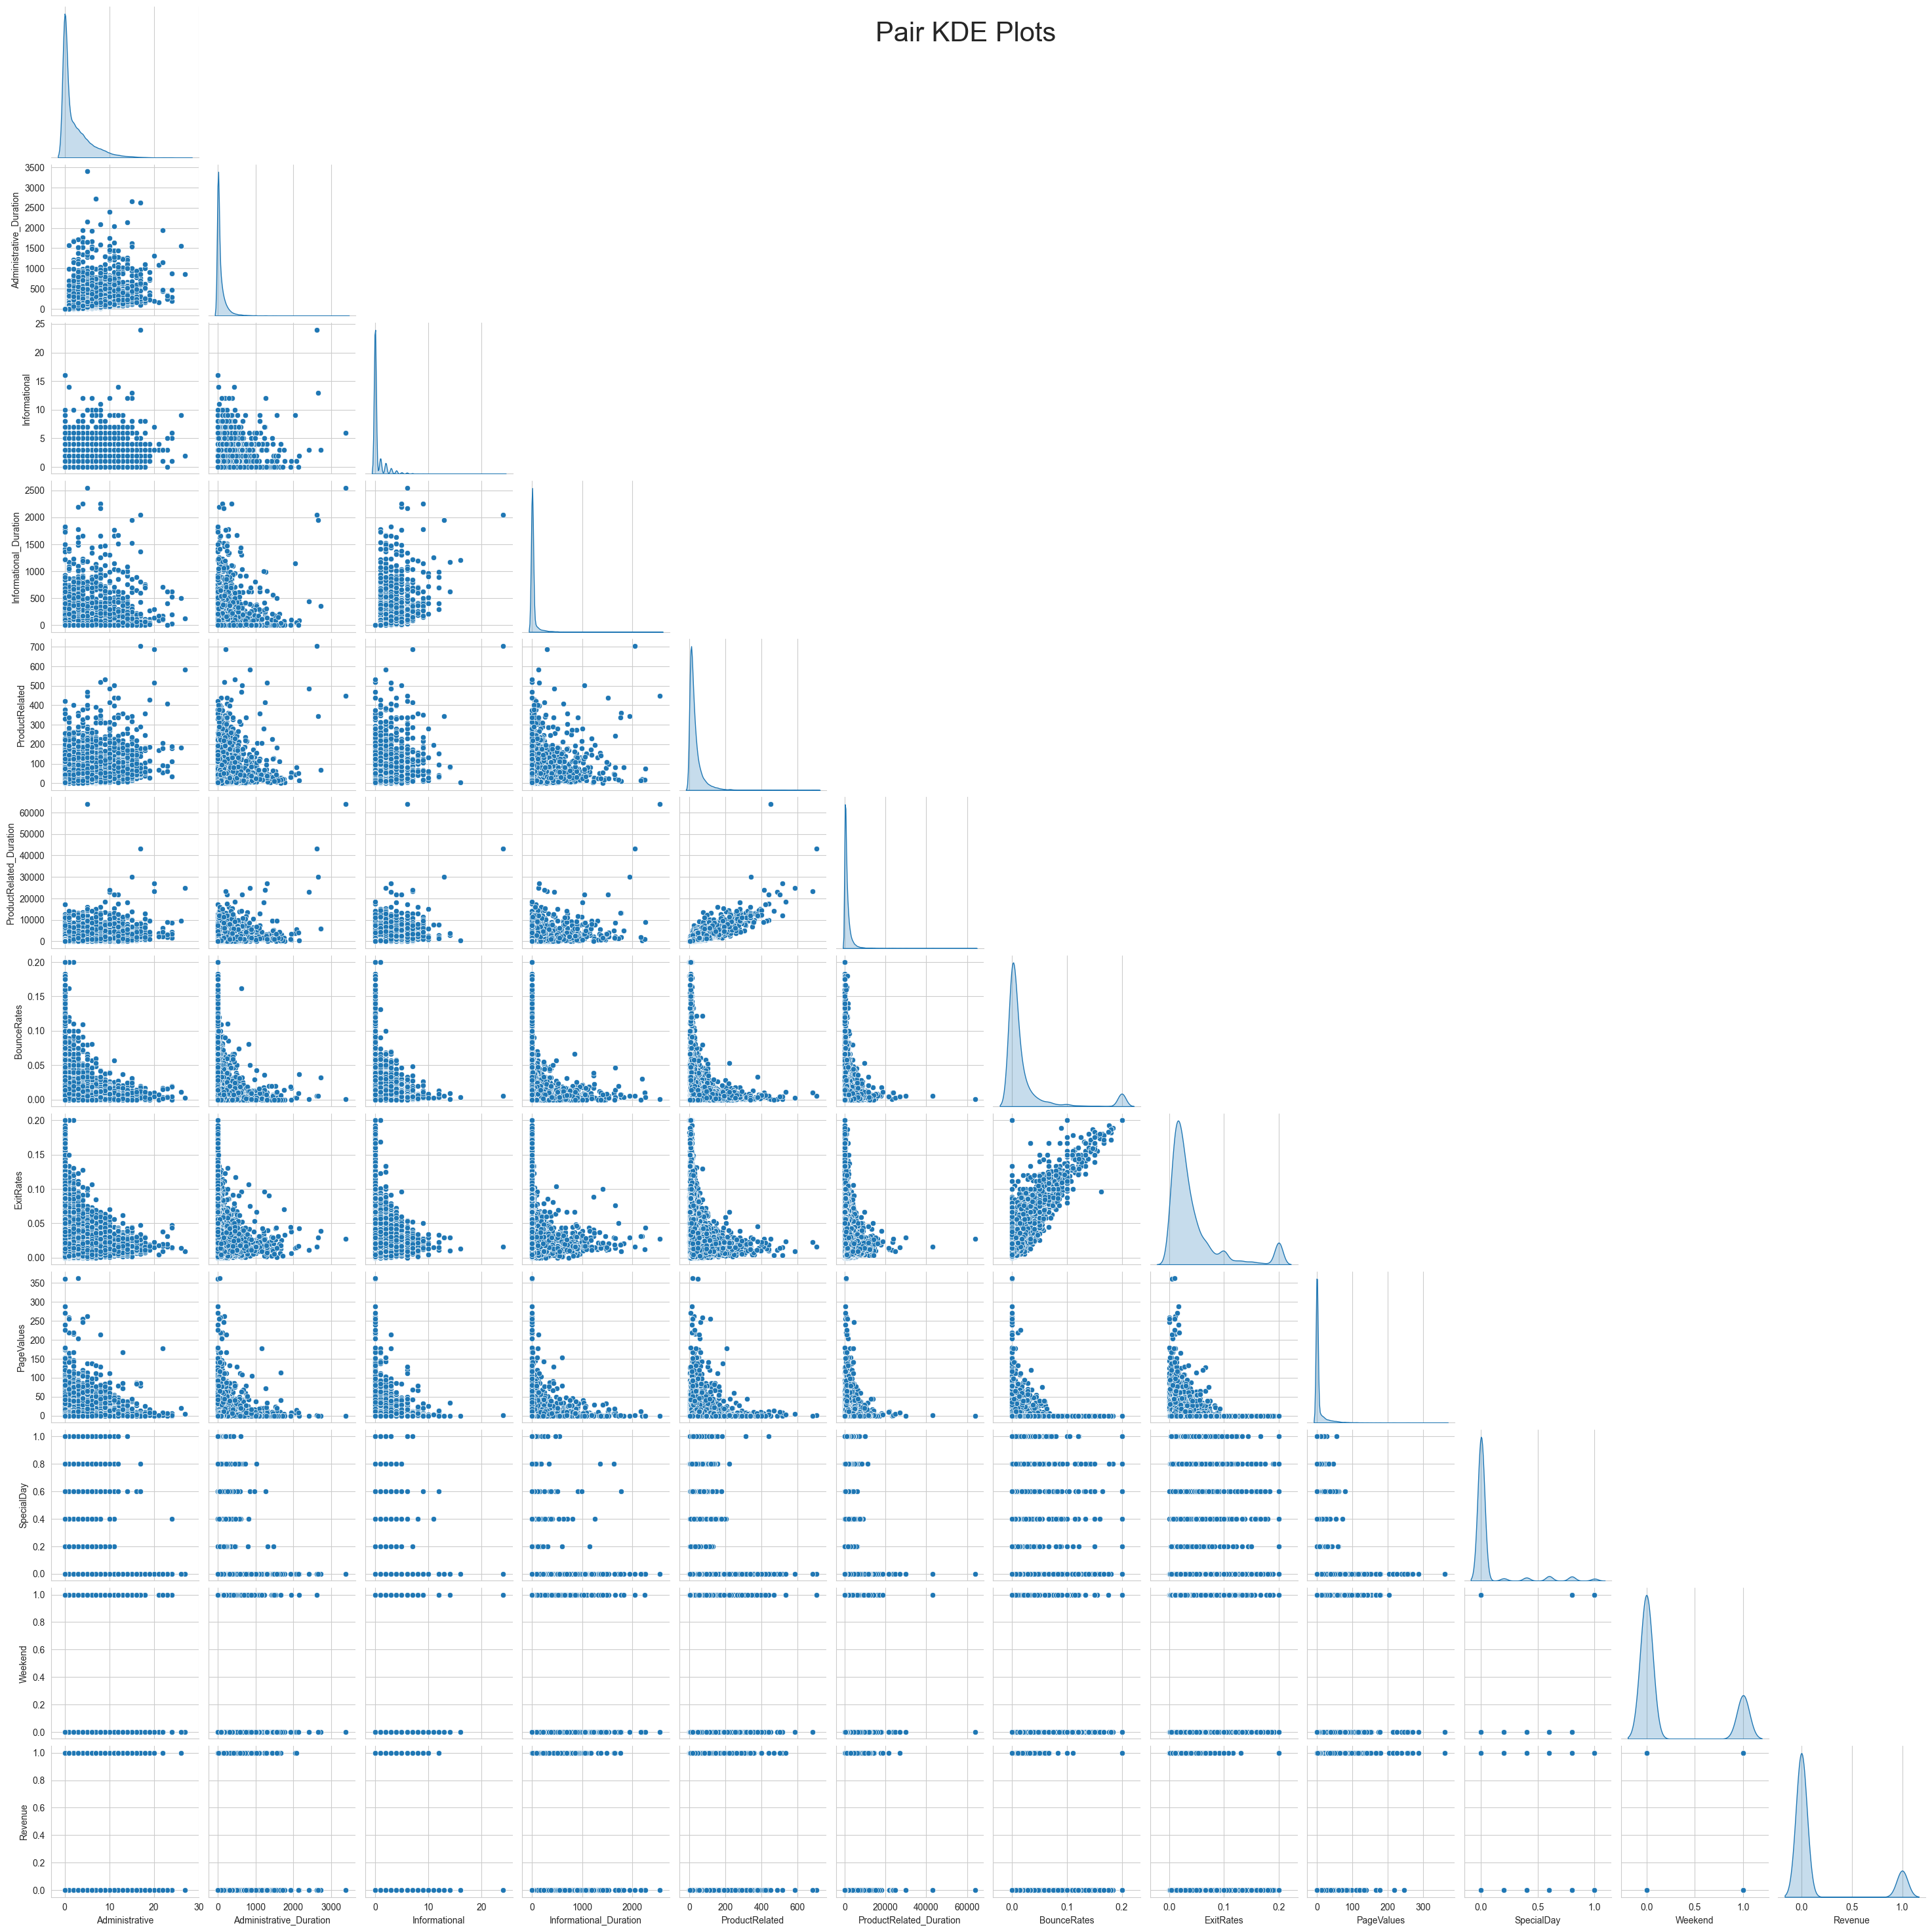

In [15]:
# Pair and KDE plot of features
# https://seaborn.pydata.org/generated/seaborn.pairplot.html
pp = sns.pairplot(df, diag_kind = 'kde', corner = True)
pp.fig.suptitle('Pair KDE Plots', fontsize = 30);

Because of the nature of categorical features, it is difficult to interpret the pair plots with these features. The following visualizations examine the relationship of the numerical features with the revenue outcome. In the main analysis, all of the features will be included and feature importance will be examined. Thus, for the sake of space, only a subset of the features were selected for this exploratory analysis based on the following rationale. First, it seems reasonable to hypothesize that the product-related page views and page value features are more likely related to the purchase of products than administrative and informational pages. Second, low exit and bounce rates as well as holidays seem likely to be associated with purchases. In addition, because we already know that the page view and duration features are correlated, as are exit and bounce rates, we might reasonably assume that any relationship between one feature with revenue will be similar to the relationship of revenue with the corresponding correlated feature. 

In the following box plot of revenue outcome against product-related page views, we can see that the median page views is slightly higher for sessions which resulted in revenue. However, the interquartile range of the revenue and non-revenue session categories overlap. This suggests that there is no significant difference between the two groups. In addition, we can see that there are a large number of outliers. This corresponds with the right skew of the KDE plot above.

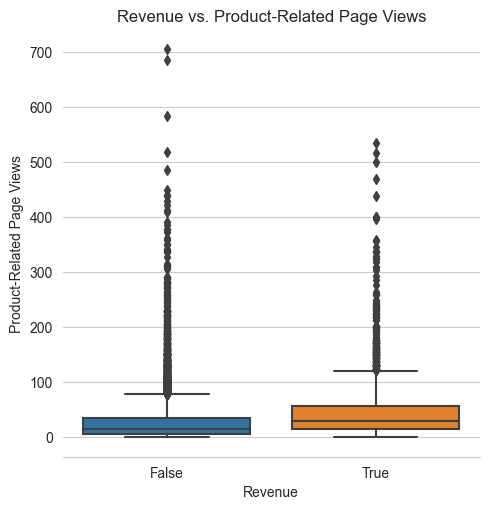

In [16]:
# Box plot of product-related pages view count by revenue outcome
# https://seaborn.pydata.org/tutorial/categorical.html

sns.set_style('whitegrid')
g = sns.catplot(data=df, x='Revenue', y='ProductRelated', kind='box')
g.despine(left=True)
g.set_axis_labels('Revenue', 'Product-Related Page Views')
plt.title('Revenue vs. Product-Related Page Views');

Unsurprisingly, the following box plot of page value against revenue outcome indicates there is likely a difference between the two groupings. This is as expected because users who view pages with low value ratings are not likely to make a purchase.

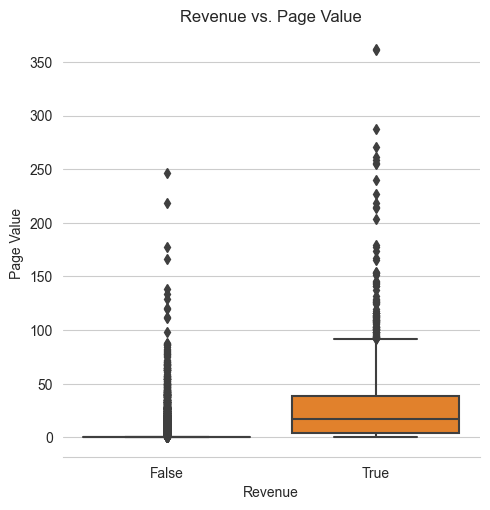

In [17]:
# Box plot of page value by revenue outcome
g = sns.catplot(data=df, x='Revenue', y='PageValues', kind='box')
g.despine(left=True)
g.set_axis_labels('Revenue', 'Page Value')
plt.title('Revenue vs. Page Value');

In the box plot of exit rate against revenue outcome below, the difference between the medians appears relatively small in comparison to the overall spread of the interquartile ranges. This suggests there might not be a significant difference.

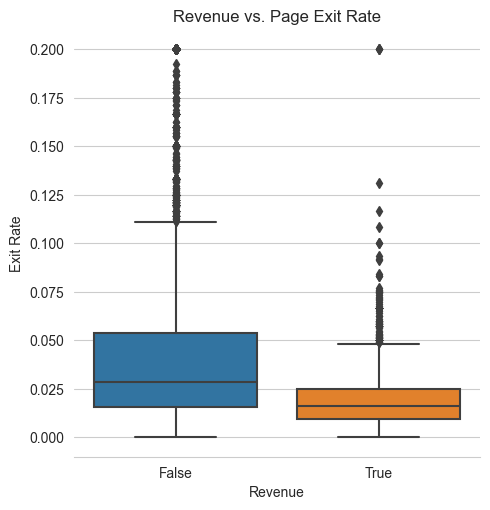

In [18]:
# Box plot of exit rate by revenue outcome
g = sns.catplot(data=df, x='Revenue', y='ExitRates', kind='box')
g.despine(left=True)
g.set_axis_labels('Revenue', 'Exit Rate')
plt.title('Revenue vs. Page Exit Rate');

Thus far, we have looked at relationships between pairs of features, but interactions with multiple features might exist. In the grouped bar chart below, product-related page views for revenue outcome are grouped by month. The 95% confidence interval error bars overlap for June through October and December, but not for February, March, May, and November. No data exists for January and April. Thus, month appears to play a role in this relationship.

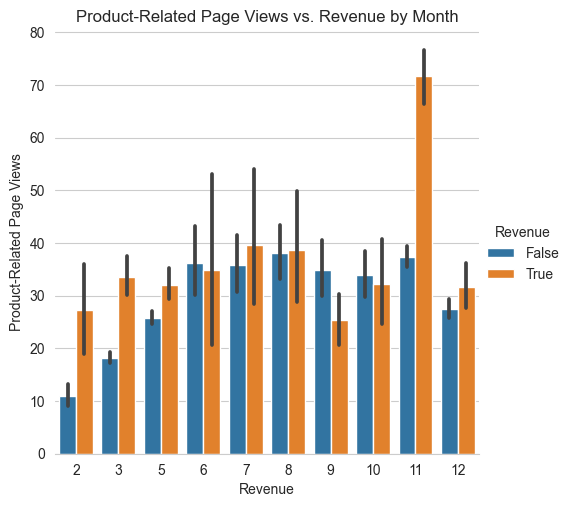

In [19]:
# Grouped bar chart of product-related page views by revenue outcome grouped by month

g = sns.catplot(data=df, x='Month', y='ProductRelated', hue='Revenue', kind='bar')
g.despine(left=True)
g.set_axis_labels('Revenue', 'Product-Related Page Views')
plt.title('Product-Related Page Views vs. Revenue by Month');

In the following grouped bar chart of page values for revenue outcome grouped by month, there is no overlap of the error bars for each month, indicating significant differences regardless of month.

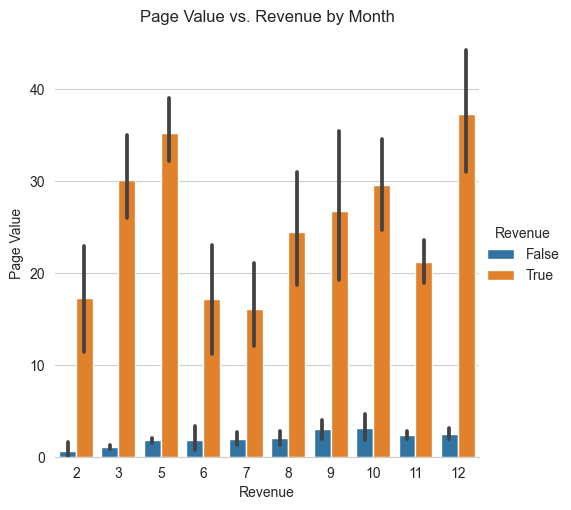

In [20]:
# Grouped bar chart of page value by revenue outcome grouped by month

g = sns.catplot(data=df, x='Month', y='PageValues', hue='Revenue', kind='bar')
g.despine(left=True)
g.set_axis_labels('Revenue', 'Page Value')
plt.title('Page Value vs. Revenue by Month');

For exit rate, the error bars are well-separated with the exception of October.

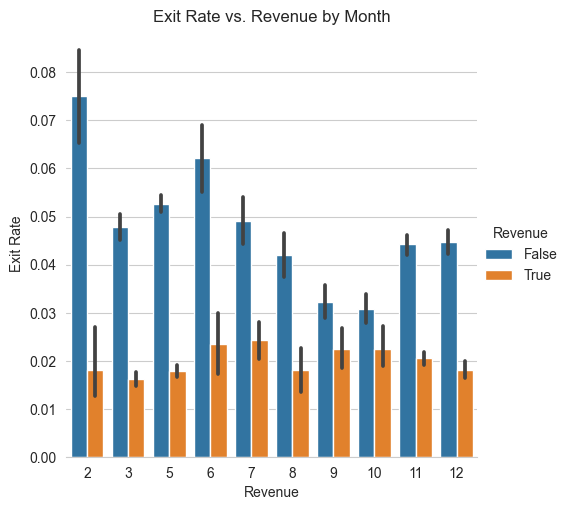

In [21]:
# Grouped bar chart of exit rate by revenue outcome grouped by month

g = sns.catplot(data=df, x='Month', y='ExitRates', hue='Revenue', kind='bar')
g.despine(left=True)
g.set_axis_labels('Revenue', 'Exit Rate')
plt.title('Exit Rate vs. Revenue by Month');

Interestingly, no data appears to exist for proximity to special days except for the months of February and May (presumably corresponding to the Valentine's and Mother's Day holidays). In addition, the error bar for sessions resulting in purchases in February completely overlaps the no-purchase error bar. This suggests that no distinction exists between those sessions that resulted in purchases in terms of proximity to Valentine's Day.

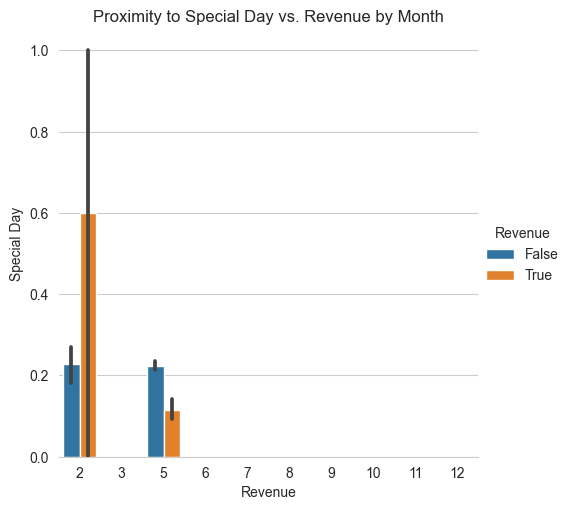

In [22]:
# Grouped bar plot of special day proximity by revenue outcome grouped by month
g = sns.catplot(data=df, x='Month', y='SpecialDay', hue='Revenue', kind='bar')
g.despine(left=True)
g.set_axis_labels('Revenue', 'Special Day')
plt.title('Proximity to Special Day vs. Revenue by Month');

Although the above exploratory analysis is by no means exhaustive, from what we have seen so far, we might expect page value to be one of the strong numerical predictors of revenue outcome followed by exit or bounce rate and month. Fortunately, it is possible to determine feature importance of both numerical and categorical features with tree ensemble methods. 

## Methods
For the main analysis, random forest and gradient boosting models were fit to the data and optimized by tuning the hyperparameters. For the random forest model, the number of features, number of trees, and maximum depth were optimized. For the boosting model, the learning rate, maximum depth, and number of trees were optimized. To prevent overfitting, a randomly-selected 80:20 training-validation split was applied. Because the target feature is unbalanced, the more robust F1 score (i.e., harmonic mean of precision and recall) was used as the optimization metric. As previously discussed, tree ensemble methods are not impacted by collinearity or skewness, so it was not necessary to transform the data or drop any features for these models, and the pre-processing performed above is sufficient. Finally, the relative effectiveness of the optimized models in predicting revenue for this dataset and feature importance were compared. 

In [23]:
# Split dataset into 80:20 training-validation sets

# Create list of independent feature names
import copy
X_names = copy.deepcopy(col_names)
X_names.remove('Revenue')

# Split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[X_names], 
                                                    df['Revenue'], 
                                                    test_size = 0.2, 
                                                    random_state = 0)

print("Number of training samples:", len(X_train))
print("Number of validation samples:", len(X_test))

Number of training samples: 9864
Number of validation samples: 2466


### Hyperparameter Optimization
#### Random Forest
First, the number of features selected for each tree in the random forest was optimized. In the graph below, F1 scores for the predicted classfication on the test set are plotted against the number of features. The maximum score occurs when $5$ features are randomly selected for each tree. This is close to the common recommendation of the square root of the total number of features $(\sqrt{17}\approx 4.12)$.

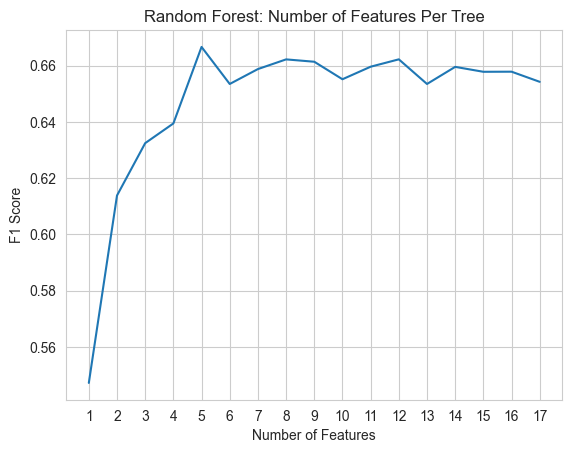

In [24]:
# Random forest classifier number of features hyperparameter tuning 
# References:
# https://scikit-learn.org/stable/modules/ensemble.html
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
# https://machinelearningmastery.com/random-forest-ensemble-in-python/

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# Create list from 1 to total number of independent features
num_features = np.arange(1, len(X_names) + 1)

rf_feat_f1_scores = []

# For random forests of trees with one to all independent features
for i in num_features:
    # Fit random forest classifier with i features/tree
    rfc = RandomForestClassifier(n_estimators = 1000,       # number of trees 
                                 max_features = i,          # features/tree
                                 n_jobs = -1,               # parallel processing
                                 random_state = 0           # make deterministic
                                 ).fit(X_train, y_train)    # fit to training data   
    
    # Predict revenue outcome of test set with model
    y_pred = rfc.predict(X_test)

    # Calculate and record F1 scores
    rf_feat_f1_scores.append(f1_score(y_test, y_pred))

# Plot results
sns.set_style('whitegrid')
g = sns.lineplot(x = num_features, y = rf_feat_f1_scores)
g.set(xlabel = 'Number of Features',
      ylabel = 'F1 Score',
      title = 'Random Forest: Number of Features Per Tree')
plt.xticks(num_features);

In [25]:
# Optimal number of features
rf_features = np.argmax(rf_feat_f1_scores)+1
print("Optimal number of features/tree:", rf_features)

Optimal number of features/tree: 5


Next, the number of trees was optimized. In the plot below, we can see that the F1 score is maximized with $800$ trees.

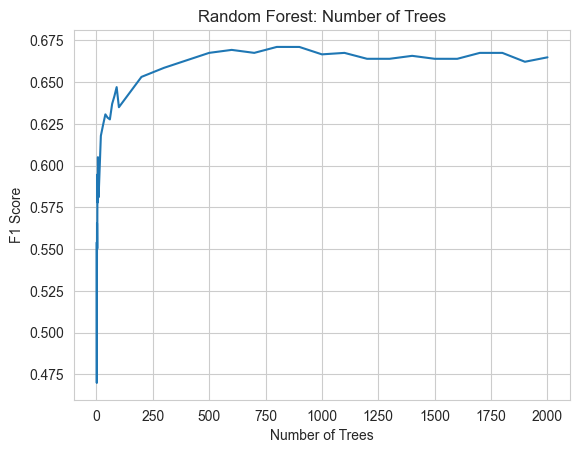

In [26]:
# Random forest classifier number of trees hyperparameter tuning 

# Create list of number of trees
num_trees = np.concatenate([np.arange(1, 10),np.arange(10, 100, 10),np.arange(100, 2001, 100)])

rf_trees_f1_scores = []

# For each number of trees in list
for i in num_trees:

    # Fit random forest classifier with i trees
    rfc = RandomForestClassifier(n_estimators = i,              # number of trees
                                 max_features = rf_features,    # number of features/tree
                                 n_jobs = -1,                   # parallel processing
                                 random_state = 0               # make deterministic
                                 ).fit(X_train, y_train)        # fit to training data
    
    # Predict revenue outcome of test set with model
    y_pred = rfc.predict(X_test)

    # Calculate and record F1 scores
    rf_trees_f1_scores.append(f1_score(y_test, y_pred))

# Plot results
g = sns.lineplot(x = num_trees, y = rf_trees_f1_scores)
g.set(xlabel = 'Number of Trees',
      ylabel = 'F1 Score',
      title = 'Random Forest: Number of Trees');

In [27]:
# Optimal number of trees
rf_trees = num_trees[np.argmax(rf_trees_f1_scores)]
print("Optimal number of trees:", rf_trees)

Optimal number of trees: 800


Lastly, the maximum tree depth was examined. The effect of limiting the maximum tree depth is shown in the chart below. The maximum F1 score reaches a maximum at a depth of $35$ and higher. Because the same score is attained from this point onward, this is most likely the maximum possible depth achievable for the selected maximum number of features per tree.

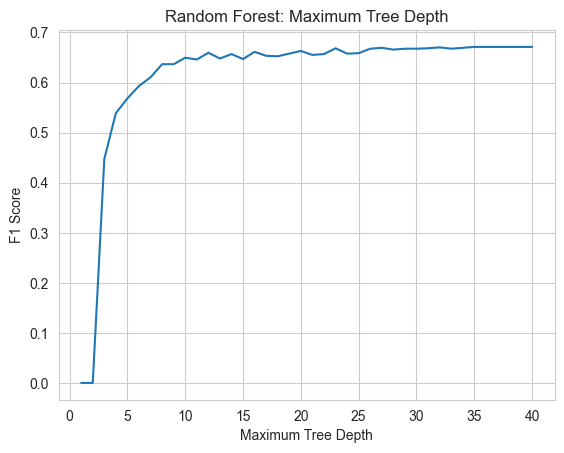

In [28]:
# Random forest classifier maximum tree depth hyperparameter tuning 

# Create list of depths from from 1 to 40
depths = np.arange(1, 41)

rf_depth_f1_scores = []

# For random forests of trees with one to all independent features
for i in depths:
    # Fit random forest classifier with maximum tree depth i (with parallel processing)
    rfc = RandomForestClassifier(n_estimators = rf_trees,       # number of trees
                                 max_depth = i,                 # maximum depth of tree
                                 max_features = rf_features,    # maximum features/tree
                                 n_jobs = -1,                   # parallel processing
                                 random_state = 0               # make deterministic
                                 ).fit(X_train, y_train)        # fit to training data
    
    # Predict revenue outcome of test set with model
    y_pred = rfc.predict(X_test)

    # Calculate and record F1 scores
    rf_depth_f1_scores.append(f1_score(y_test, y_pred))

# Plot results
g = sns.lineplot(x = depths, y = rf_depth_f1_scores)
g.set(xlabel = 'Maximum Tree Depth',
      ylabel = 'F1 Score',
      title = 'Random Forest: Maximum Tree Depth');

In [29]:
# Optimal maximum tree depth
rf_depth = np.argmax(rf_depth_f1_scores) + 1
print("Optimal maximum tree depth:", rf_depth)

Optimal maximum tree depth: 35


In [30]:
# Fit optimized random forest model
rfc = RandomForestClassifier(n_estimators = rf_trees,       # number of trees
                             max_depth = rf_depth,          # maximum tree depth
                             max_features = rf_features,    # maximum features/tree
                             n_jobs = -1,                   # parallel processing
                             random_state = 0               # make deterministic
                             ).fit(X_train, y_train)        # fit to training data

#### Gradient Boosting
For the gradient boosting model, the learning rate was first optimized for an ensemble of $100$ trees of depth one. As shown in the plot below, a learning rate of $0.38$ maximized the F1 score. We can also see that the performance effectively levels out beyond this rate. (It is also worth noting that there is an interaction between the number of trees and learning rate hyperparameters.)

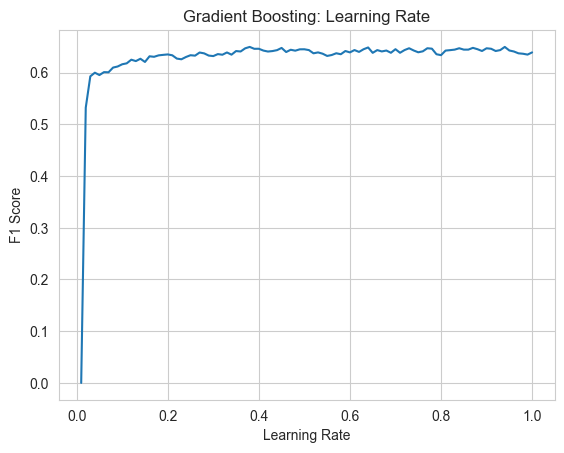

In [31]:
# Optimize gradient boosting classifier learning rate hyperparameter
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
# https://machinelearningmastery.com/configure-gradient-boosting-algorithm/

from sklearn.ensemble import GradientBoostingClassifier

# Create list of rates from from 0.1 to 1.0
rates = np.arange(0.01, 1.01, 0.01)

gb_lr_f1_scores = []

for rate in rates:
    # Fit gradient boosting classifier with learning rate
    gbc = GradientBoostingClassifier(learning_rate = rate,
                                     n_estimators = 100,         # number of stumps
                                     max_depth = 1,              # maximum tree depth
                                     random_state = 0,           # make deterministic
                                     ).fit(X_train, y_train)     # fit to training data

    # Predict revenue outcome of test set with model
    y_pred = gbc.predict(X_test)

    # Calculate and record F1 scores
    gb_lr_f1_scores.append(f1_score(y_test, y_pred))

# Plot results
g = sns.lineplot(x = rates, y = gb_lr_f1_scores)
g.set(xlabel = 'Learning Rate',
      ylabel = 'F1 Score',
      title = 'Gradient Boosting: Learning Rate');

In [32]:
# Optimal number of trees
gb_lr = rates[np.argmax(gb_lr_f1_scores)]
print("Optimal learning rate:", gb_lr)

Optimal learning rate: 0.38


Next, the maximum depth of the trees was optimized. The maximum F1 score was achieved with trees of depth one as seen in the plot below.

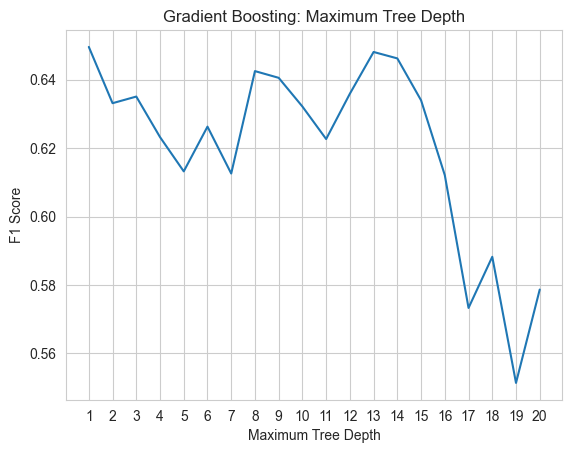

In [33]:
# Optimize gradient boosting classifier maximum depth hyperparameter

# Create list of depths from from 1 to 10
depths = np.arange(1, 21)

gb_depth_f1_scores = []

for depth in depths:
    # Fit gradient boosting classifier with maximum tree depth
    gbc = GradientBoostingClassifier(learning_rate = gb_lr,
                                     n_estimators = 100,         # number of stumps
                                     max_depth = depth,          # maximum tree depth
                                     random_state = 0,           # make deterministic
                                     ).fit(X_train, y_train)     # fit to training data

    # Predict revenue outcome of test set with model
    y_pred = gbc.predict(X_test)

    # Calculate and record F1 scores
    gb_depth_f1_scores.append(f1_score(y_test, y_pred))

# Plot results
g = sns.lineplot(x = depths, y = gb_depth_f1_scores)
g.set(xlabel = 'Maximum Tree Depth',
      ylabel = 'F1 Score',
      title = 'Gradient Boosting: Maximum Tree Depth')
plt.xticks(depths);

In [34]:
# Optimal maximum tree depth
gb_depth = np.argmax(gb_depth_f1_scores) + 1
print("Optimal maximum tree depth:", gb_depth)

Optimal maximum tree depth: 1


Finally, the optimal number of trees was determined to be $100$ as seen in the following chart.

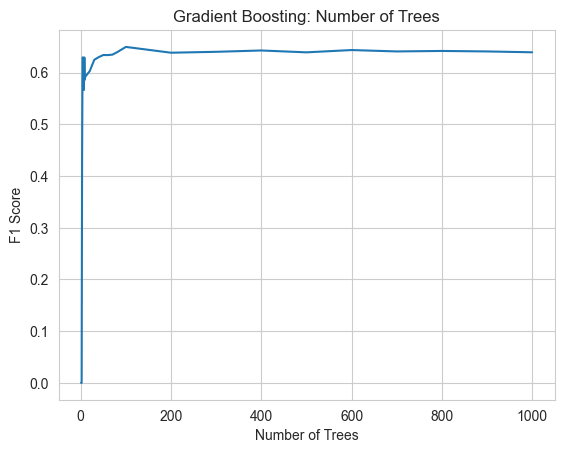

In [35]:
# Optimize gradient boosting classifier number of trees hyperparameter

# Create list of number of trees
num_trees = np.concatenate([np.arange(1, 10),np.arange(10, 100, 10),np.arange(100, 1001, 100)])

gb_trees_f1_scores = []

for i in num_trees:
    # Fit gradient boosting classifier
    gbc = GradientBoostingClassifier(learning_rate = gb_lr,
                                     n_estimators = i,           # number of stumps
                                     max_depth = gb_depth,       # maximum tree depth
                                     random_state = 0,           # make deterministic
                                     ).fit(X_train, y_train)     # fit to training data

    # Predict revenue outcome of test set with model
    y_pred = gbc.predict(X_test)

    # Calculate and record F1 scores
    gb_trees_f1_scores.append(f1_score(y_test, y_pred))

# Plot results
g = sns.lineplot(x = num_trees, y = gb_trees_f1_scores)
g.set(xlabel = 'Number of Trees',
      ylabel = 'F1 Score',
      title = 'Gradient Boosting: Number of Trees');

In [36]:
# Optimal number of trees
gb_trees = num_trees[np.argmax(gb_trees_f1_scores)]
print("Optimal number of trees:", gb_trees)

Optimal number of trees: 100


In [37]:
# Fit optimized gradient boosting model
gbc = GradientBoostingClassifier(learning_rate = gb_lr,
                                 n_estimators = gb_trees,    # number of stumps
                                 max_depth = gb_depth,       # maximum tree depth
                                 random_state = 0,           # make deterministic
                                 ).fit(X_train, y_train)     # fit to training data

In [38]:
# Calculate feature importances for each model
# References: 
# https://www.datacamp.com/tutorial/random-forests-classifier-python
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.feature_importances_

# Obtain feature importances for random forest model
rfc_feature_importances_df = pd.DataFrame({'Model':'Random Forest',
                                            'Feature' : X_train.columns, 
                                            'Importance' : rfc.feature_importances_
                                            }).sort_values(by='Importance',ascending=False)

# Obtain feature importances for gradient boosting model
gbc_feature_importances_df = pd.DataFrame({'Model':'Gradient Boosting',
                                            'Feature' : X_train.columns, 
                                            'Importance' : gbc.feature_importances_
                                            }).sort_values(by='Importance',ascending=False)

# Concatenate dataframes
feature_importances_df = pd.concat([rfc_feature_importances_df, gbc_feature_importances_df])

## Results and Discussion
### Predictive Performance
The optimized random forest and gradient boosting models both attained a similar accuracy $(89-90\%)$ and recall $(60\%)$ in predicting the revenue outcome of the validation data. However, the random forest model had a higher precision score $(77\%)$ compared to the boosting model $(71\%)$, as well as a slightly higher F1 score $(67\%$ compared to $65\%)$. Thus, both models achieve a reasonable accuracy and have similar sensitivity in terms of avoiding false negatives, but the random forest model allows us to be more confident that we have avoided false positives.

In [39]:
# Compare accuracy, precision, and recall of two models
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Predict revenue outcome of test set with optimized random forest model
y_pred_rf = rfc.predict(X_test)

# Calculate scores
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

# Predict revenue outcome of test set with optimized gradient boosting model
y_pred_gb = gbc.predict(X_test)

# Calculate scores
gb_accuracy = accuracy_score(y_test, y_pred_gb)
gb_precision = precision_score(y_test, y_pred_gb)
gb_recall = recall_score(y_test, y_pred_gb)
gb_f1 = f1_score(y_test, y_pred_gb)

print("    Model: Random Forest  Gradient Boosting")
print(f" Accuracy: {rf_accuracy*100:.1f}%          {gb_accuracy*100:.1f}%")
print(f"Precision: {rf_precision*100:.1f}%          {gb_precision*100:.1f}%")
print(f"   Recall: {rf_recall*100:.1f}%          {gb_recall*100:.1f}%")
print(f" F1 score: {rf_f1*100:.1f}%          {gb_f1*100:.1f}%")

    Model: Random Forest  Gradient Boosting
 Accuracy: 90.0%          88.9%
Precision: 77.0%          70.9%
   Recall: 59.5%          60.0%
 F1 score: 67.1%          65.0%


### Feature Importance
The grouped bar chart below compares normalized feature importance for each of the models. The page value feature is the strongest predictor of revenue outcome for both the random forest and gradient boosting models. This is unsurprising because page value represents the expected revenue resulting from any particular page. Despite this common important feature, there are many other differences in the feature importance results of the two models. In the random forest model, exit rate and product-related page duration are the second and third most important features, whereas month and visitor type are the second and third more important in the gradient boosting model. It is also worth nothing that the random forest model incorporated all of the features except special day proximity (which only includes data for two months). In contrast, only seven out of seventeen features were important for the gradient boosting model. Thus, the random forest model provides a much more complete ranking of feature importance, but the boosting model demonstrates that we can achieve almost as good a prediction with only half of the features.

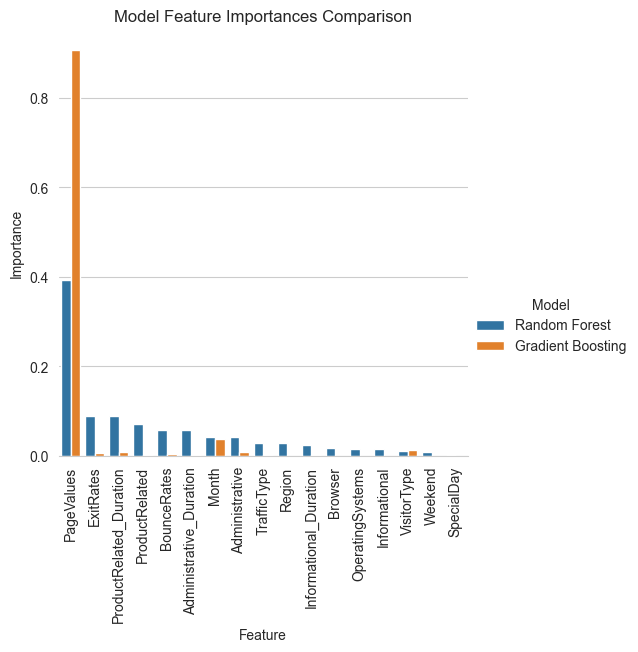

In [40]:
# Grouped bar chart of feature importances
sns.set_style('whitegrid')
g = sns.catplot(data=feature_importances_df, 
                kind='bar',
                x='Feature', 
                y='Importance', 
                hue='Model')
g.despine(left=True)
g.set_xticklabels(rotation=90)
plt.title('Model Feature Importances Comparison');

## Conclusion
In this project, I compared the effectiveness of the random forest and gradient boosting tree ensemble supervised learning methods in predicting the revenue outcome from e-commerce site user session data. After optimizing three hyperparameters for each model, the random forest model performed slightly better on accuracy, precision, and F1 metrics on a validation subset of the data. In addition, the random forest model provided a clear ranking of feature importance for each of the features, while only seven features were important for the gradient boosting model. For both models, the page value feature was the most important feature, but the relative importance of other features differed between the models.

Given the slightly better prediction performance, more complete feature importance information, and the faster performance possible with parallel processing of the random forest model, one might conclude that the random forest model is a better choice for predicting revenue outcome for this dataset. However, another perspective might be that the advantage of the gradient boosting model is its ability to perform almost as well with fewer features. In addition, it is important to note that the hyperparameter tuning of both models was not exhaustive. Further optimization could result in different outcomes. Future research could explore this question as well as whether reasonable predictions can be made without the page value feature, which essentially encodes revenue outcome.

## References

Brownlee, J. (2016, September 12). How to configure the gradient boosting algorithm. _Machine Learning Mastery._ [https://machinelearningmastery.com/configure-gradient-boosting-algorithm/](https://machinelearningmastery.com/configure-gradient-boosting-algorithm/)

Brownlee, J. (2020, April 20). How to develop a random forest ensemble in Python. _Machine Learning Mastery._ [https://machinelearningmastery.com/random-forest-ensemble-in-python/](https://machinelearningmastery.com/random-forest-ensemble-in-python/)

Google analytics help center. (2023). Google. [https://support.google.com/analytics/](https://support.google.com/analytics/)

James, G., Witten, D., Hastie, T., & Tibshirani, R. (2021). _An introduction to statistical learning._
Springer.

Sakar, C., & Kastro, Y. (2018). Online shoppers purchasing intention dataset. _UCI Machine Learning Repository._ [https://doi.org/10.24432/C5F88Q](https://doi.org/10.24432/C5F88Q)

Scikit Learn. (2023). [https://scikit-learn.org/](https://scikit-learn.org/)

Shafi, A. (2023, February). Random forest classification with Scikit-Learn. _Datacamp._ [https://www.datacamp.com/tutorial/random-forests-classifier-python](https://www.datacamp.com/tutorial/random-forests-classifier-python)